# Association between metrics of genome instability and nuclear morphology

Figure 5A-B in the manuscript.

In [1]:
# 0 - imports
import matplotlib.pyplot as plt
import palettable as pal

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.colors as clr
import seaborn as sns
from scipy import stats

from analysis.utils import load_pre_post_processing
import analysis.cluster as clu
import analysis.visualizations as vis

%matplotlib inline
mpl.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'white'

pathai_colors = {
    "spacecadet":"#2D2849",
    "darkgreen":"#195866",
    "mediumgreen":"#2AA095",
    "violet":"#793EF8",
    "turquoise":"#4CEAD3",
    "raspberry":"#C5304B",
    "darkgray":"#333132",
    "lightgray":"#EEEEEE",
    "lightviolet":"#EBE2FE",
    "lightgreen":"#E1EFED",
    "_darkblue":"#173D52",
    "_lightblue":"#16B2E1",
    "_purple":"#852693",
    "_red":"#E11C29",
}

pathai_cmaps = {key: clr.LinearSegmentedColormap.from_list(key, ['#FFFFFF',pathai_colors[key]], N=256) for key in pathai_colors.keys()}


palette = [pathai_colors["violet"], pathai_colors["_lightblue"], pathai_colors["darkgray"]]
scolormap = pal.scientific.sequential.Batlow_13.mpl_colormap
dcolormap = pal.scientific.diverging.Vik_18.mpl_colormap

In [2]:
cancer_nuhif_data, fibroblast_nuhif_data, lymphocyte_nuhif_data, meta_data = load_pre_post_processing(prefix="../")

In [3]:
brca_meta_names = list(meta_data["brca"].columns)
prad_meta_names = list(meta_data["prad"].columns)
luad_meta_names = list(meta_data["luad"].columns)

common_meta = set(brca_meta_names).intersection(prad_meta_names).intersection(luad_meta_names)

In [4]:
def retrieve_xy(subtype, xname, yname, filter_dict=None, celltype="cancer"):
    if celltype=="cancer":
        nuhif_data = cancer_nuhif_data
    elif celltype=="lymphocyte":
        nuhif_data = lymphocyte_nuhif_data
    elif celltype=="fibroblast":
        nuhif_data = fibroblast_nuhif_data
    else:
        assert 1==0
        
    xdf = nuhif_data[subtype]
    ydf = meta_data[subtype]
    
    if filter_dict:
        for key in filter_dict.keys():
            ydf = ydf[ydf[key].isin(filter_dict[key])]
        xdf = xdf.loc[ydf.index]
    
    x = xdf[xname].values
    y = ydf[yname].values
    
    good_vals = np.logical_and(~np.isnan(x), ~np.isnan(y))
    x = x[good_vals]
    y = y[good_vals]
    return x, y
    
def summary_str(name, x, y):
    r, p = stats.spearmanr(x, y)
    if p < 0.001:
        pstr = "p < 0.001"
    else:
        pstr = f"p = {np.round(p, 3)}"

    summary = f"{name}\nr = {np.round(r, 3)}, {pstr}, N = {len(x)}"
    return summary

def plot_pancan_instability(xname, yname, xname_short, yname_short, strx, stry, xlim=None, ylim=None, celltype="cancer"):
    fig, sp = plt.subplot_mosaic(
        """abcd""",
        figsize=(7.5,2)
    )
    ax = sp["a"]
    bx = sp["b"]
    cx = sp["c"]
    dx = sp["d"]

    xb, yb = retrieve_xy("brca", xname, yname, celltype=celltype)
    strb = summary_str("BRCA", xb, yb)
    xl, yl = retrieve_xy("luad", xname, yname, celltype=celltype)
    strl = summary_str("LUAD", xl, yl)
    xp, yp = retrieve_xy("prad", xname, yname, celltype=celltype)
    strp = summary_str("PRAD", xp, yp)

    ax.plot(xb, yb, ls="", marker="o", markersize=1.5, color=palette[0])
    bx.plot(xl, yl, ls="", marker="o", markersize=1.5, color=palette[1])
    cx.plot(xp, yp, ls="", marker="o", markersize=1.5, color=palette[2])

    strall = summary_str("Pan-Can", np.hstack([xb,xl,xp]), np.hstack([yb,yl,yp]))
    dx.plot(xb, yb, ls="", marker="o", markersize=1.5, color=palette[0])
    dx.plot(xp, yp, ls="", marker="o", markersize=1.5, color=palette[2])
    dx.plot(xl, yl, ls="", marker="o", markersize=1.5, color=palette[1])

    ax.text(strx, stry, strb, fontsize=6)
    bx.text(strx, stry, strl, fontsize=6)
    cx.text(strx, stry, strp, fontsize=6)
    dx.text(strx, stry, strall, fontsize=6)

    if xlim:
        for xx in [ax, bx, cx, dx]:
            xx.set_xlim(xlim)
            xx.set_xlabel(xname_short)

    if ylim:
        for xx in [ax, bx, cx, dx]:
            xx.set_ylim(ylim)
        ax.set_ylabel(yname_short)
        for xx in [bx, cx, dx]:
            xx.set_yticklabels([])
            
    return fig

# Cancer Cells

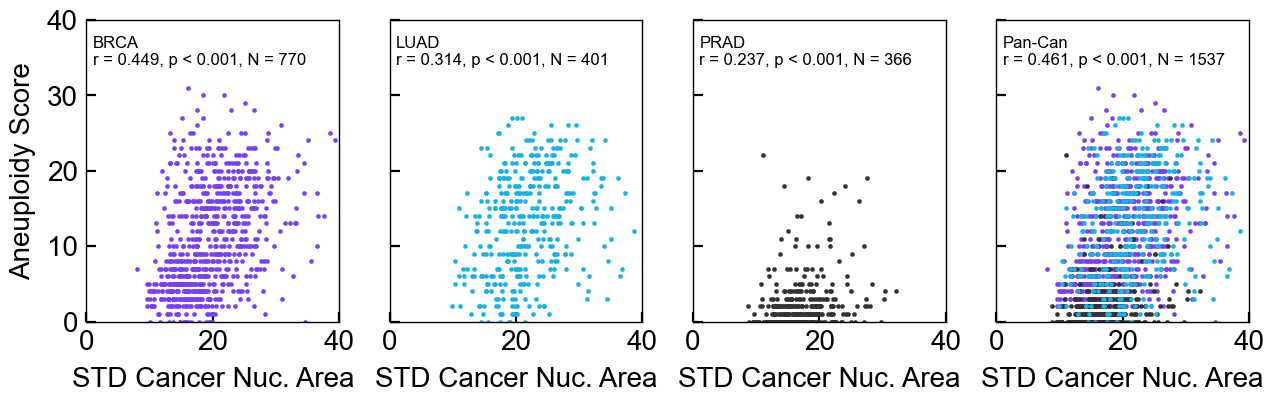

In [5]:
xname = 'STD[CANCER CELL_NUCLEUS_AREA]_H & E'
xname_short = "STD Cancer Nuc. Area"
yname = "aneuploidy_score"
yname_short = "Aneuploidy Score"
xlim = [0, 40]
ylim=[0,40]
strx = 1
stry = 34

fig = plot_pancan_instability(xname, yname, xname_short, yname_short, strx, stry, xlim=xlim, ylim=ylim)

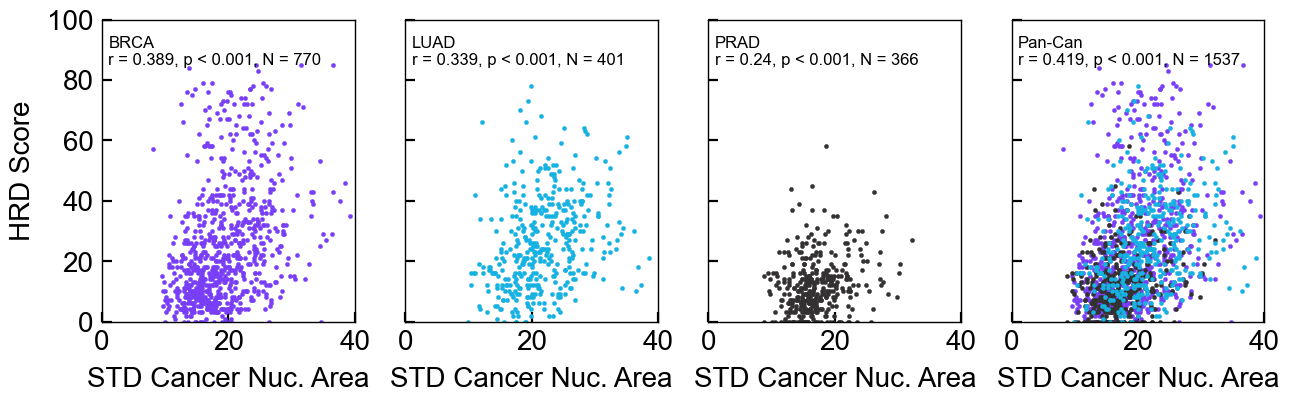

In [6]:
xname = "STD[CANCER CELL_NUCLEUS_AREA]_H & E"
xname_short = "STD Cancer Nuc. Area"
yname = "hrd_score"
yname_short = "HRD Score"
xlim = [0, 40]
ylim=[0,100]
strx = 1
stry = 85

fig = plot_pancan_instability(xname, yname, xname_short, yname_short, strx, stry, xlim=xlim, ylim=ylim)